<a href="https://colab.research.google.com/github/basmala-kamal/Penguin-Discriminant-Analysis/blob/main/Penguin_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Fisher LDA and Multinomial

# Installing packages

In [ ]:
install.packages("MASS")
install.packages("nnet")
install.packages("readr")
library(MASS)
library(nnet)
library(readr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Pre-processing data

In [ ]:
df = read.csv("/content/penguins_size.csv", header=TRUE)

str(df)
df = na.omit(df)

'data.frame':	344 obs. of  7 variables:
 $ species          : chr  "Adelie" "Adelie" "Adelie" "Adelie" ...
 $ island           : chr  "Torgersen" "Torgersen" "Torgersen" "Torgersen" ...
 $ culmen_length_mm : num  39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ culmen_depth_mm  : num  18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int  181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int  3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : chr  "MALE" "FEMALE" "FEMALE" NA ...


In [ ]:
# Our numeric predictors
num_vars = c("culmen_length_mm", "culmen_depth_mm",
              "flipper_length_mm", "body_mass_g")

# Our class variable
class_var = "species"

# Subset the data frame
df_sub = df[, c(num_vars, class_var)]

df_sub[[class_var]] = as.factor(df_sub[[class_var]])

summary(df_sub)

 culmen_length_mm culmen_depth_mm flipper_length_mm  body_mass_g  
 Min.   :32.10    Min.   :13.10   Min.   :172       Min.   :2700  
 1st Qu.:39.50    1st Qu.:15.60   1st Qu.:190       1st Qu.:3550  
 Median :44.50    Median :17.30   Median :197       Median :4050  
 Mean   :43.99    Mean   :17.16   Mean   :201       Mean   :4209  
 3rd Qu.:48.58    3rd Qu.:18.70   3rd Qu.:213       3rd Qu.:4794  
 Max.   :59.60    Max.   :21.50   Max.   :231       Max.   :6300  
      species   
 Adelie   :146  
 Chinstrap: 68  
 Gentoo   :120  
                
                
                

# Validating assumptions

Checking normality assumption using qq-plot for each of our numeric variables for the different classes

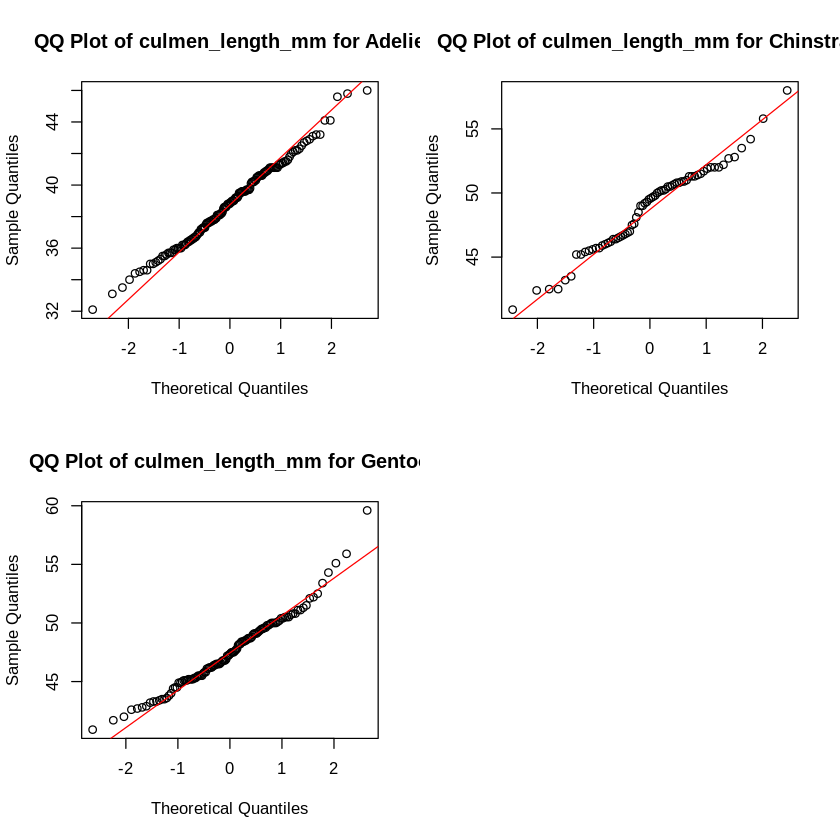

In [ ]:
par(mfrow=c(2,2))
species_levels = levels(df_sub[[class_var]])

for(sp in species_levels) {
  # Subset one variable at a time (culmen_length_mm)
  vals = df_sub[df_sub[[class_var]] == sp, "culmen_length_mm"]

  qqnorm(vals, main=paste("QQ Plot of culmen_length_mm for", sp))
  qqline(vals, col="red")
}
par(mfrow=c(1,1))


The graphs show an approximation to normal distribution

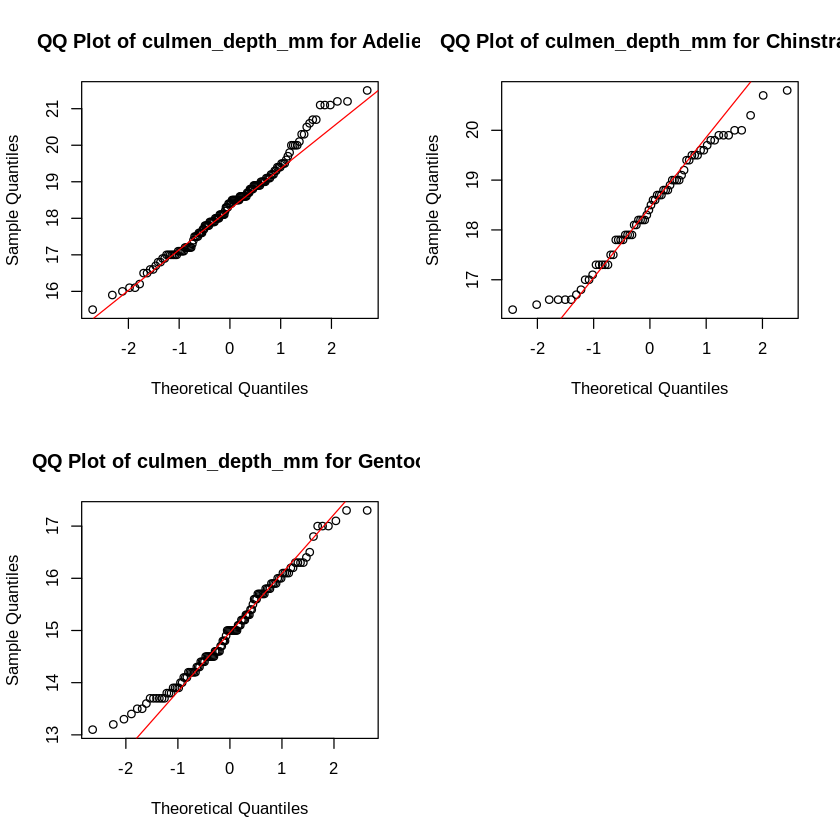

In [ ]:
par(mfrow=c(2,2))
species_levels = levels(df_sub[[class_var]])

for(sp in species_levels) {
  # Subset one variable at a time (culmen_depth_mm)
  vals = df_sub[df_sub[[class_var]] == sp, "culmen_depth_mm"]

  qqnorm(vals, main=paste("QQ Plot of culmen_depth_mm for", sp))
  qqline(vals, col="red")
}
par(mfrow=c(1,1))


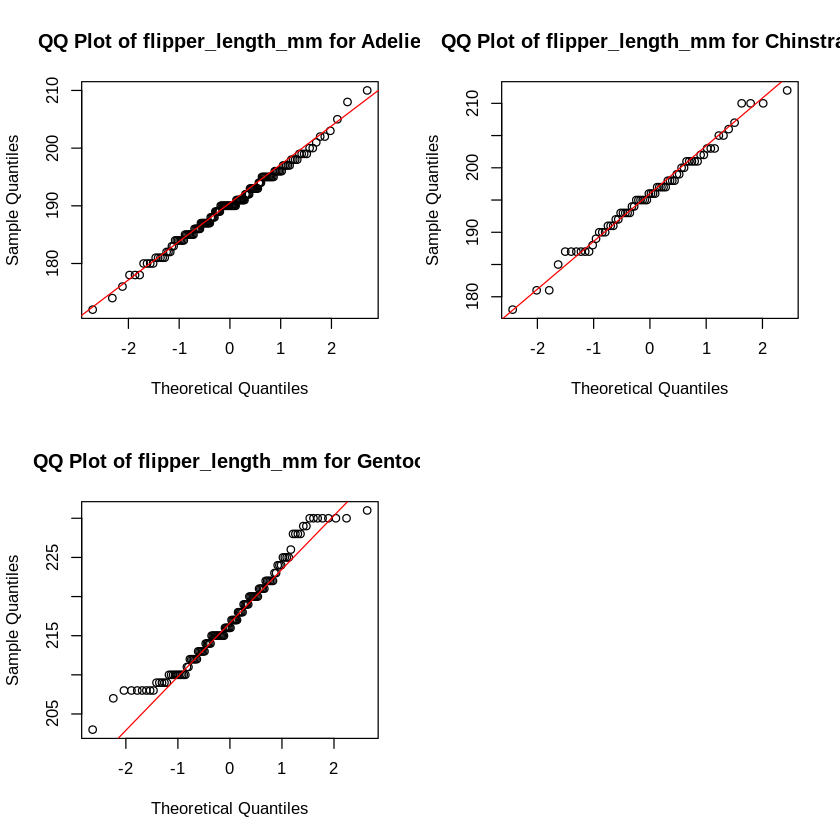

In [ ]:
par(mfrow=c(2,2))
species_levels = levels(df_sub[[class_var]])

for(sp in species_levels) {
  # Subset one variable at a time (flipper_length_mm)
  vals = df_sub[df_sub[[class_var]] == sp, "flipper_length_mm"]

  qqnorm(vals, main=paste("QQ Plot of flipper_length_mm for", sp))
  qqline(vals, col="red")
}
par(mfrow=c(1,1))


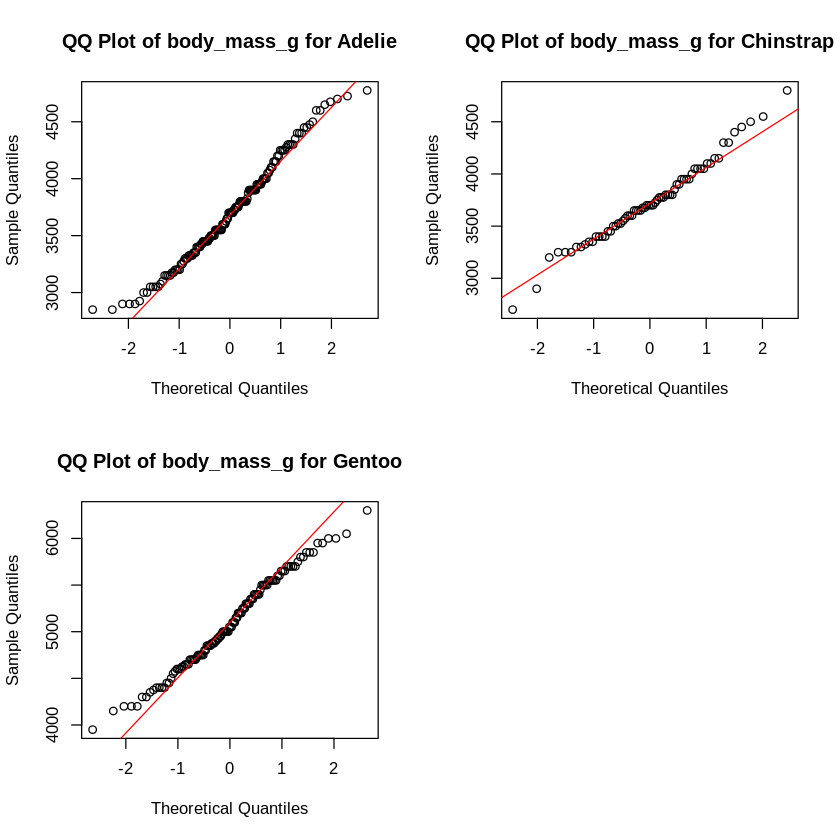

In [ ]:
par(mfrow=c(2,2))
species_levels = levels(df_sub[[class_var]])

for(sp in species_levels) {
  # Subset one variable at a time (body_mass_g)
  vals = df_sub[df_sub[[class_var]] == sp, "body_mass_g"]

  qqnorm(vals, main=paste("QQ Plot of body_mass_g for", sp))
  qqline(vals, col="red")
}
par(mfrow=c(1,1))


all of the graphs show an approximation to normal distribtuion; thus, assumption 1 is validated

Validating the second assumption: equivalence of covariance matrices

In [ ]:
numeric_data <- df[sapply(df, is.numeric)]

# covariance matrix
cov_matrices <- lapply(names(numeric_data), function(col) {
  cov_matrix <- cov(numeric_data[[col]], numeric_data, use = "complete.obs")
  return(cov_matrix)
})


names(cov_matrices) <- names(numeric_data)


for (col in names(cov_matrices)) {
  cat("\nCovariance matrix for column:", col, "\n")
  print(cov_matrices[[col]])
}


is_equal <- all(sapply(cov_matrices[-1], function(mat) all(mat == cov_matrices[[1]])))

if (is_equal) {
  cat("\nAll covariance matrices are equal.\n")
} else {
  cat("\nCovariance matrices are not equal.\n")
}



Covariance matrix for column: culmen_length_mm 
     culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
[1,]         29.81729       -2.456922          49.93222    2588.843

Covariance matrix for column: culmen_depth_mm 
     culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
[1,]        -2.456922        3.872668         -15.96968    -749.138

Covariance matrix for column: flipper_length_mm 
     culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
[1,]         49.93222       -15.96968          196.6214    9854.669

Covariance matrix for column: body_mass_g 
     culmen_length_mm culmen_depth_mm flipper_length_mm body_mass_g
[1,]         2588.843        -749.138          9854.669    647761.2

Covariance matrices are not equal.


The covariance matrices are not equal but let us assume that the assumption is valid for testing and practicality purposes

# Approach 1: Fisher's Linear Discriminant Analysis

In [ ]:

x = df_sub[, num_vars]
y = df_sub[[class_var]]

#Internal Validation

f_lda = lda(x, grouping=y)

pred_in = predict(f_lda)$class

# Confusion matrix
tab_in = table(Actual=y, Predicted=pred_in)
cat("=== FLDA Internal Validation Confusion Matrix ===\n")
print(tab_in)

# misclassification percentage
err_in_lda = 1 - sum(diag(tab_in)) / sum(tab_in)
cat(sprintf("Internal Misclassification Rate (FLDA) = %.2f%%\n\n", 100*err_in_lda))


# External Validation
n = nrow(x)
pred_out = rep(NA, n)

for(i in 1:n){

  train_idx = setdiff(1:n, i)

  lda_loo = lda(x[train_idx,], grouping=y[train_idx])


  pred_out[i] = predict(lda_loo, newdata=x[i,,drop=FALSE])$class
}

# Confusion matrix
tab_out = table(Actual=y, Predicted=pred_out)
cat("=== FLDA External Validation (LOO) Confusion Matrix ===\n")
print(tab_out)

err_out_lda = 1 - sum(diag(tab_out)) / sum(tab_out)
cat(sprintf("External Misclassification Rate (FLDA) = %.2f%%\n", 100*err_out_lda))



=== FLDA Internal Validation Confusion Matrix ===
           Predicted
Actual      Adelie Chinstrap Gentoo
  Adelie       145         1      0
  Chinstrap      3        65      0
  Gentoo         0         0    120
Internal Misclassification Rate (FLDA) = 1.20%

=== FLDA External Validation (LOO) Confusion Matrix ===
           Predicted
Actual        1   2   3
  Adelie    144   2   0
  Chinstrap   3  65   0
  Gentoo      0   0 120
External Misclassification Rate (FLDA) = 1.50%


The data seems to have well-separated clusters since the errors are small. The validation of the first assumption is good for applying FLDA. The External Validation shows a realistic (not very optimistic error rate) since it does not test with the same subset of data.

# Approach 2: Classification with the multinomial distributions

In [ ]:
# multinomial
f_multinom = multinom(y ~ ., data=data.frame(x, y))

# Internal Validation
pred_in_mn = predict(f_multinom)

# Confusion matrix
tab_in_mn = table(Actual=y, Predicted=pred_in_mn)
cat("\n=== Multinomial Internal Validation Confusion Matrix ===\n")
print(tab_in_mn)

err_in_mn = 1 - sum(diag(tab_in_mn)) / sum(tab_in_mn)
cat(sprintf("Internal Misclassification Rate (Multinomial) = %.2f%%\n\n", 100*err_in_mn))



# External Validation

pred_out_mn = rep(NA, n)

for(i in 1:n){
  train_idx = setdiff(1:n, i)


  f_mn_loo = multinom(y ~ ., data=data.frame(x[train_idx,], y=y[train_idx]))

  pred_out_mn[i] = predict(f_mn_loo, newdata=data.frame(x[i,,drop=FALSE]))
}

tab_out_mn = table(Actual=y, Predicted=pred_out_mn)
cat("=== Multinomial External Validation (LOO) Confusion Matrix ===\n")
print(tab_out_mn)

err_out_mn = 1 - sum(diag(tab_out_mn)) / sum(tab_out_mn)
cat(sprintf("External Misclassification Rate (Multinomial) = %.2f%%\n", 100*err_out_mn))


# weights:  18 (10 variable)
initial  value 366.936504 
iter  10 value 16.227376
iter  20 value 3.895062
iter  30 value 1.543882
iter  40 value 0.004877
iter  50 value 0.000591
iter  60 value 0.000233
iter  70 value 0.000208
iter  80 value 0.000208
iter  90 value 0.000205
iter 100 value 0.000170
final  value 0.000170 
stopped after 100 iterations

=== Multinomial Internal Validation Confusion Matrix ===
           Predicted
Actual      Adelie Chinstrap Gentoo
  Adelie       146         0      0
  Chinstrap      0        68      0
  Gentoo         0         0    120
Internal Misclassification Rate (Multinomial) = 0.00%

# weights:  18 (10 variable)
initial  value 365.837892 
iter  10 value 16.169283
iter  20 value 3.953766
iter  30 value 1.504634
iter  40 value 0.004267
iter  50 value 0.000512
iter  60 value 0.000381
iter  70 value 0.000146
iter  80 value 0.000146
iter  90 value 0.000145
iter 100 value 0.000145
final  value 0.000145 
stopped after 100 iterations
# weights:  18 (10 varia

Multinomial worked for 100 iterations until it converged and stopped. It shows greater flexibility to the assmuptions stated since they are not required. The external error rate is still better then the internal for the same reasons stated for the FLDA. The internal raises some concerns about overfitting but external showed robust generalization.

**Graphing the multinomial results**

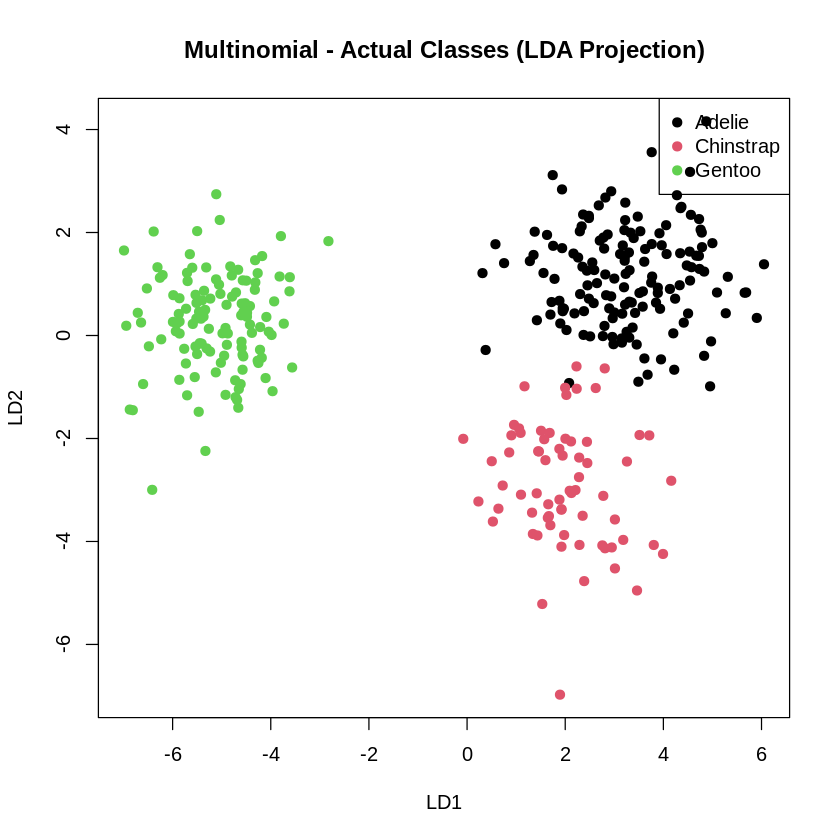

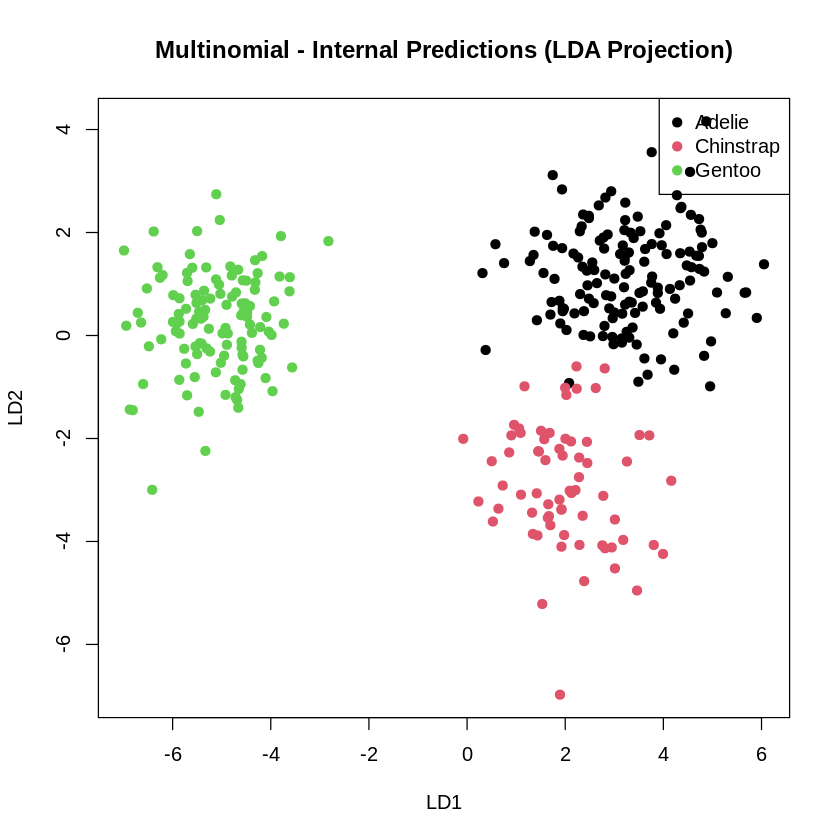

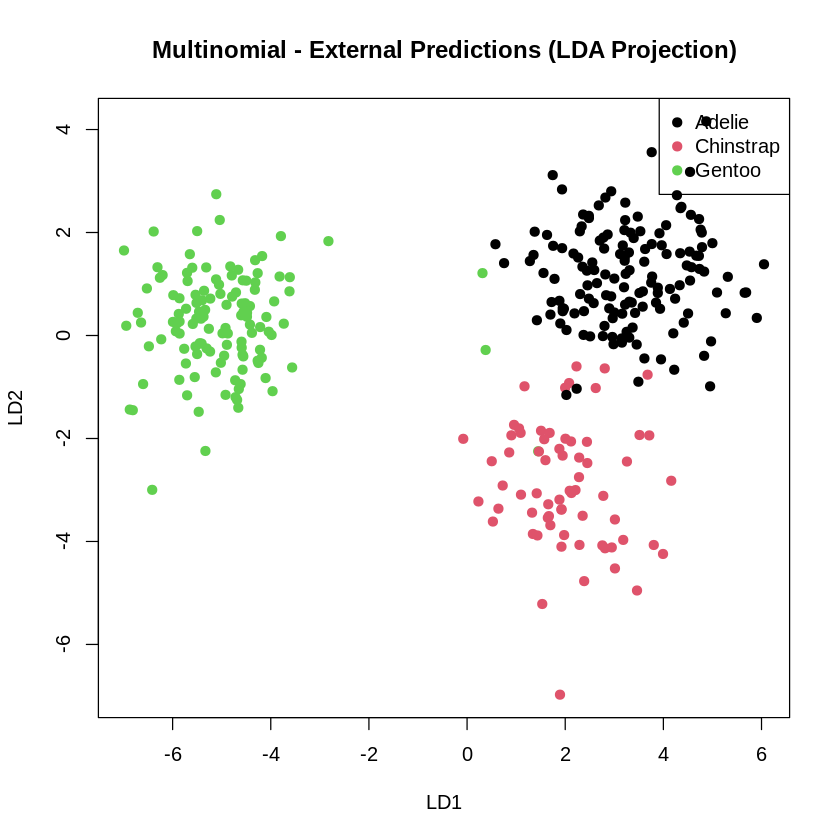

In [ ]:
full_data = data.frame(x, y)

lda_proj = lda(y ~ ., data = full_data)
lda_coords = predict(lda_proj)$x  # LDA scores (LD1 and LD2)

plot(lda_coords, col = as.numeric(y), pch = 19,
     main = "Multinomial - Actual Classes (LDA Projection)",
     xlab = "LD1", ylab = "LD2")
legend("topright", legend=levels(y), col=1:length(levels(y)), pch=19)

# Plot predicted class (internal)
plot(lda_coords, col = as.numeric(pred_in_mn), pch = 19,
     main = "Multinomial - Internal Predictions (LDA Projection)",
     xlab = "LD1", ylab = "LD2")
legend("topright", legend=levels(y), col=1:length(levels(y)), pch=19)

# Plot predicted class (external)
plot(lda_coords, col = as.numeric(pred_out_mn), pch = 19,
     main = "Multinomial - External Predictions (LDA Projection)",
     xlab = "LD1", ylab = "LD2")
legend("topright", legend=levels(y), col=1:length(levels(y)), pch=19)

The results suggest that Gentoo might exhibit a well-separation of characterstics but the overlap might arise from Adelie and Chinstrap species.

# Approach 3: FLDA2 and Projecttion (FLDA for two classes at a time)


=== FLDA2 Classification Table ===
        Predicted
Real     Adelie Gentoo
  Adelie    146      0
  Gentoo      1    119
Error Rate = 0.38%


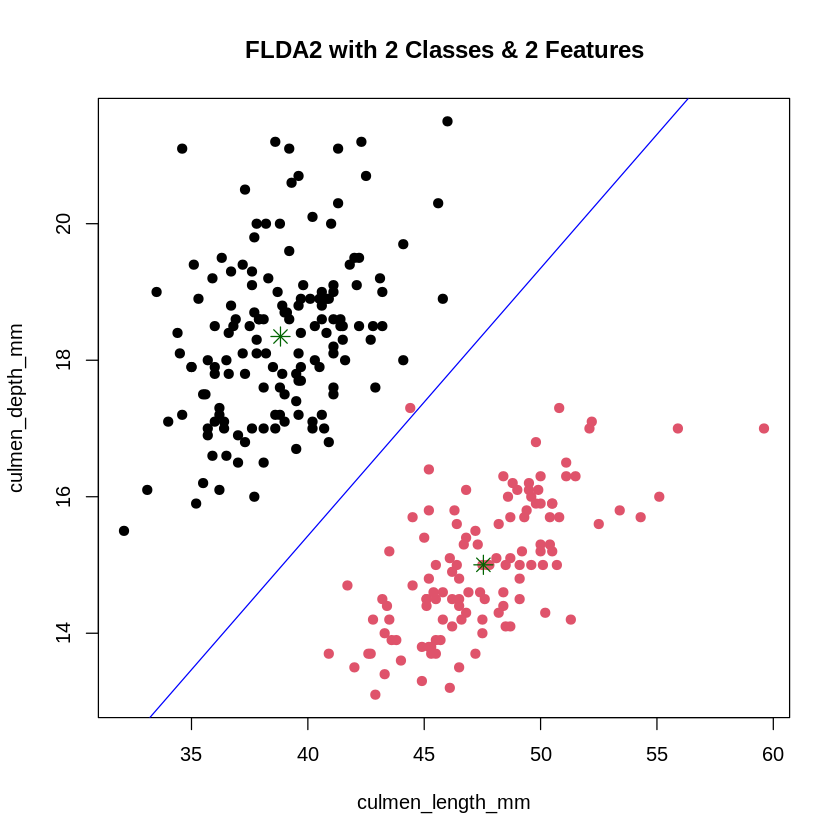

In [ ]:
# performing pair-wise flda2
df_two = subset(df_sub, species %in% c("Adelie","Gentoo"))

df_two_vars = c("culmen_length_mm","culmen_depth_mm")
x_two = df_two[, df_two_vars]
class_two = droplevels(df_two$species)


flda2 = function(x, class) {
  if(ncol(x)!=2) {
    cat("Data should be 2-dimensional\n"); return(NULL)
  }
  t = factor(class)
  level = levels(t)
  if(length(level)!=2) {
    cat("Data should have exactly two groups\n"); return(NULL)
  }

  x_group1 = x[class == level[1], ]
  x_group2 = x[class == level[2], ]

  n1 = nrow(x_group1); n2 = nrow(x_group2)
  n = n1 + n2

  mu1 = colMeans(x_group1)
  mu2 = colMeans(x_group2)

  S1 = cov(x_group1)
  S2 = cov(x_group2)
  Sp = ((n1-1)*S1 + (n2-1)*S2) / (n - 2)

  d = mu1 - mu2
  m = (mu1 + mu2)/2

  a = solve(Sp) %*% d

  # internal validation
  combined = rbind(x_group1, x_group2)
  group_label = c(rep(level[1], n1), rep(level[2], n2))

  # (x - m)^T a
  scores = apply(combined, 1, function(xx) (xx - m) %*% a)

  pred_group = ifelse(scores > 0, level[1], level[2])

  tab = table(Real=group_label, Predicted=pred_group)
  cat("\n=== FLDA2 Classification Table ===\n")
  print(tab)
  er = 1 - sum(diag(tab))/sum(tab)
  cat(sprintf("Error Rate = %.2f%%\n", 100*er))


  plot(combined, col=as.numeric(factor(group_label)), pch=19,
       xlab=colnames(x)[1], ylab=colnames(x)[2],
       main="FLDA2 with 2 Classes & 2 Features")

  cst = sum(m * a)
  slope = -a[1]/a[2]
  intercept = cst/a[2]

  abline(a=intercept, b=slope, col="blue")
  points(rbind(mu1, mu2), pch=8, cex=1.5, col="darkgreen")
}


flda2(x_two, class_two)


Adelie and Gentoo seem to have a good separation except only for one point when it comes to culmen length and depth


=== FLDA2 Classification Table ===
           Predicted
Real        Adelie Chinstrap
  Adelie       144         2
  Chinstrap      4        64
Error Rate = 2.80%


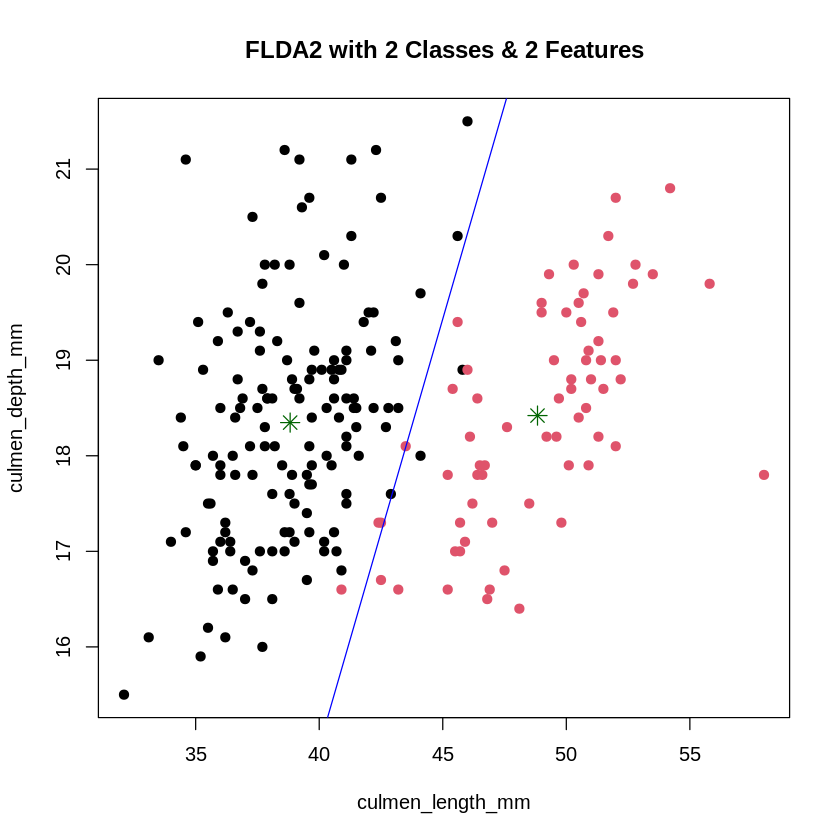

In [ ]:
df_two = subset(df_sub, species %in% c("Adelie","Chinstrap"))


df_two_vars = c("culmen_length_mm","culmen_depth_mm")
x_two = df_two[, df_two_vars]
class_two = droplevels(df_two$species)


flda2 = function(x, class) {
  if(ncol(x)!=2) {
    cat("Data should be 2-dimensional\n"); return(NULL)
  }
  t = factor(class)
  level = levels(t)
  if(length(level)!=2) {
    cat("Data should have exactly two groups\n"); return(NULL)
  }

  x_group1 = x[class == level[1], ]
  x_group2 = x[class == level[2], ]

  n1 = nrow(x_group1); n2 = nrow(x_group2)
  n = n1 + n2

  mu1 = colMeans(x_group1)
  mu2 = colMeans(x_group2)

  S1 = cov(x_group1)
  S2 = cov(x_group2)
  Sp = ((n1-1)*S1 + (n2-1)*S2) / (n - 2)

  d = mu1 - mu2
  m = (mu1 + mu2)/2

  a = solve(Sp) %*% d

  # internal validation
  combined = rbind(x_group1, x_group2)
  group_label = c(rep(level[1], n1), rep(level[2], n2))

  # (x - m)^T a
  scores = apply(combined, 1, function(xx) (xx - m) %*% a)

  pred_group = ifelse(scores > 0, level[1], level[2])

  tab = table(Real=group_label, Predicted=pred_group)
  cat("\n=== FLDA2 Classification Table ===\n")
  print(tab)
  er = 1 - sum(diag(tab))/sum(tab)
  cat(sprintf("Error Rate = %.2f%%\n", 100*er))


  plot(combined, col=as.numeric(factor(group_label)), pch=19,
       xlab=colnames(x)[1], ylab=colnames(x)[2],
       main="FLDA2 with 2 Classes & 2 Features")

  cst = sum(m * a)
  slope = -a[1]/a[2]
  intercept = cst/a[2]

  abline(a=intercept, b=slope, col="blue")
  points(rbind(mu1, mu2), pch=8, cex=1.5, col="darkgreen")
}


flda2(x_two, class_two)


We can observe the greater overlap between Adelie and Chinstrap


=== FLDA2 Classification Table ===
           Predicted
Real        Chinstrap Gentoo
  Chinstrap        66      2
  Gentoo            3    117
Error Rate = 2.66%


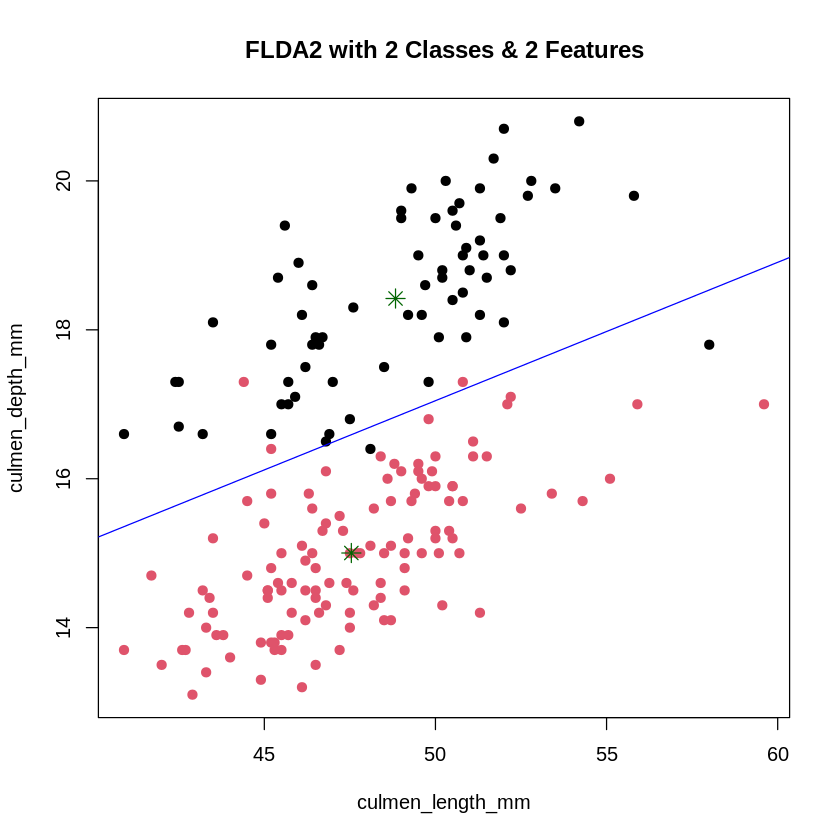

In [ ]:

df_two = subset(df_sub, species %in% c("Chinstrap","Gentoo"))


df_two_vars = c("culmen_length_mm","culmen_depth_mm")
x_two = df_two[, df_two_vars]
class_two = droplevels(df_two$species)


flda2 = function(x, class) {
  if(ncol(x)!=2) {
    cat("Data should be 2-dimensional\n"); return(NULL)
  }
  t = factor(class)
  level = levels(t)
  if(length(level)!=2) {
    cat("Data should have exactly two groups\n"); return(NULL)
  }

  x_group1 = x[class == level[1], ]
  x_group2 = x[class == level[2], ]

  n1 = nrow(x_group1); n2 = nrow(x_group2)
  n = n1 + n2

  mu1 = colMeans(x_group1)
  mu2 = colMeans(x_group2)

  S1 = cov(x_group1)
  S2 = cov(x_group2)
  Sp = ((n1-1)*S1 + (n2-1)*S2) / (n - 2)

  d = mu1 - mu2
  m = (mu1 + mu2)/2

  a = solve(Sp) %*% d

  # internal validation
  combined = rbind(x_group1, x_group2)
  group_label = c(rep(level[1], n1), rep(level[2], n2))

  # (x - m)^T a
  scores = apply(combined, 1, function(xx) (xx - m) %*% a)

  pred_group = ifelse(scores > 0, level[1], level[2])

  tab = table(Real=group_label, Predicted=pred_group)
  cat("\n=== FLDA2 Classification Table ===\n")
  print(tab)
  er = 1 - sum(diag(tab))/sum(tab)
  cat(sprintf("Error Rate = %.2f%%\n", 100*er))


  plot(combined, col=as.numeric(factor(group_label)), pch=19,
       xlab=colnames(x)[1], ylab=colnames(x)[2],
       main="FLDA2 with 2 Classes & 2 Features")

  cst = sum(m * a)
  slope = -a[1]/a[2]
  intercept = cst/a[2]

  abline(a=intercept, b=slope, col="blue")
  points(rbind(mu1, mu2), pch=8, cex=1.5, col="darkgreen")
}


flda2(x_two, class_two)


The confusion matrix of Chinstrap and Gentoo also shows overlap between both of them when it comes to culmen length and depth, the variables might be discriminative but the Chinstrap species seem to have overlapping characterstics with the other two species.